In [1]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools

In [9]:
# Plot evolution of net flux and temperature to see how long it takes to spin up
def plot_spinup(d, ax, albedo):
    olr_sum = d.olr.sum(dim = ['lon','lat'])
    short_wave_sum = d.swdn_toa.sum(dim = ['lon','lat'])
    net_flux = olr_sum - short_wave_sum*(1-albedo)    # Include surface albedo in net flux
    net_flux.plot.line(ax=ax, color='b')
    ax.set_ylabel('TOA Net Outgoing FLux / $Wm^{-2}$\nOLR - (1-$\\alpha)SW$', color='b')
    t_surf_mean = d.t_surf.mean(dim = ['lon','lat']) - 273.15  # In Celsius
    ax2 = ax.twinx()
    t_surf_mean.plot.line(ax=ax2, color='r')
    ax2.set_ylabel('Surface Temperature / $°C$', color='r')


In [2]:
# Load dataset across all months
exp_name = 'aquaplanet/vary_co2/d5'
dataset = isca_tools.load_dataset(exp_name)
namelist = isca_tools.load_namelist(exp_name)  # Need this for albedo_value
albedo = namelist['mixed_layer_nml']['albedo_value']

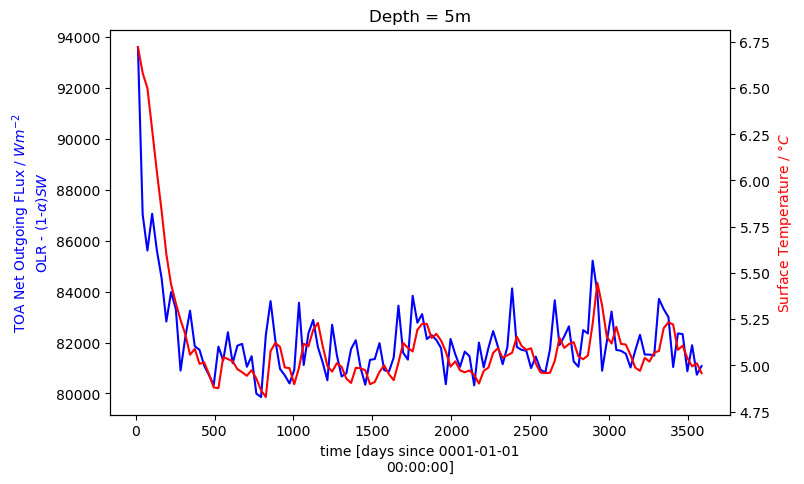

In [15]:
# Plot spinup time for each depth value
fig, ax = plt.subplots(1,1, figsize=(8, 5), sharex=True, sharey=True)
plot_spinup(dataset, ax, albedo)
# ax.set_xlim([0,1000]);
ax.set_title(f"Depth = 5m");

In [3]:
dataset

<xarray.Dataset>
Dimensions:      (lon: 64, lonb: 65, lat: 32, latb: 33, time: 1, nv: 2,
                  scalar_axis: 1)
Coordinates:
  * lon          (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lonb         (lonb) float64 -2.812 2.812 8.438 14.06 ... 345.9 351.6 357.2
  * lat          (lat) float64 -85.76 -80.27 -74.74 -69.21 ... 74.74 80.27 85.76
  * latb         (latb) float64 -90.0 -83.21 -77.61 -72.05 ... 77.61 83.21 90.0
  * time         (time) float64 15.0
  * nv           (nv) float64 1.0 2.0
  * scalar_axis  (scalar_axis) float64 0.0
Data variables:
    t_surf       (time, lat, lon) float32 dask.array<chunksize=(1, 32, 64), meta=np.ndarray>
    co2          (time, scalar_axis) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    average_T1   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds  (time, nv) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   /gpfs1/scratch/other/jamd1/isca_work/experiment/aquaplanet/va...
    title:      FMS Model results
    grid_type:  regular
    grid_tile:  N/A